In [0]:
import argparse
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
import sys
import scipy

In [0]:
########################
# Descente de gradient #
########################

#------------------------------------------------------------------------------------------#
## 1. Calculez l’expression analytique de la fonction E(x) = (x − 1)(x − 2)(x − 3)(x − 5) ##
#------------------------------------------------------------------------------------------#

def E(x):
    return (x-1)*(x-2)*(x-3)*(x-5)

In [0]:
#-----------#
## Dérivée ##
#-----------#

def dE(x):
    return 4*np.power(x,3) - 33*np.power(x,2) + 82*x -61


In [0]:
#--------------------------------------------------------------------#
## 2. Implémentez l’algorithme DG sous Python pour la fonction E(x) ##
#--------------------------------------------------------------------#

def DG(x0,n,e,t):
    x =[x0]
    res= np.array([0,E(x[0])])
    exmin = E(x[0])
    i = 1
    x.append(x[0] - n*dE(x[0])) 
    while i < t and abs(x[i] - x[i-1]) > e :
        x.append(abs(x[i] - n*dE(x[i])))
        if exmin > E(x[i]):
            exmin = E(x[i])
        pred = [i,E(x[i])]
        res = np.vstack((res,pred))
        i = i + 1 
    print ('Max_iteration =',i)
    print ('Min = ',exmin)
    return res

In [306]:
#------------------------------------------------------------------------------#
##   3. testez l’algorithme implémenté en utilisant des exemples d’exécution  ##
## 4. Affichez le minimum trouvé, ainsi que E(xmin) et le nombre d’itérations ##
#------------------------------------------------------------------------------#

print('(a) x0 = 5 et η = 0.001')
a = DG(5,0.001,0.001,1000)

print('\n(b) x0 = 5 et η = 0.01')
b = DG(5,0.01,0.001,1000)

print('\n(c) x0 = 5 et η = 0.1')
c = DG(5,0.1,0.001,1000)

print('\n(d) x0 = 5 et η = 0.17')
d = DG(5,0.17,0.001,1000)

#print('\n(e) x0 = 5 et η = 1')
#e = DG(5,1.0,0.001,1000)

print('\n(f) x0 = 0 et η = 0.001')
f = DG(0,0.001,0.001,1000)


(a) x0 = 5 et η = 0.001
Max_iteration = 106
Min =  -6.89196485736797

(b) x0 = 5 et η = 0.01
Max_iteration = 20
Min =  -6.913929319624811

(c) x0 = 5 et η = 0.1
Max_iteration = 1000
Min =  -6.630728959124845

(d) x0 = 5 et η = 0.17
Max_iteration = 1000
Min =  -6.538588969216836

(f) x0 = 0 et η = 0.001
Max_iteration = 151
Min =  -1.349463100975843


[[  0.           0.        ]
 [  1.          -0.56114808]
 [  2.          -1.06646858]
 [  3.          -1.52269704]
 [  4.          -1.93560652]
 [  5.          -2.31016646]
 [  6.          -2.65067188]
 [  7.          -2.96084912]
 [  8.          -3.24394284]
 [  9.          -3.5027879 ]
 [ 10.          -3.73986917]
 [ 11.          -3.95737141]
 [ 12.          -4.15722115]
 [ 13.          -4.34112189]
 [ 14.          -4.51058391]
 [ 15.          -4.66694958]
 [ 16.          -4.81141486]
 [ 17.          -4.94504775]
 [ 18.          -5.06880404]
 [ 19.          -5.18354092]
 [ 20.          -5.29002867]
 [ 21.          -5.38896083]
 [ 22.          -5.480963  ]
 [ 23.          -5.56660048]
 [ 24.          -5.64638495]
 [ 25.          -5.72078034]
 [ 26.          -5.79020793]
 [ 27.          -5.85505085]
 [ 28.          -5.91565806]
 [ 29.          -5.9723478 ]
 [ 30.          -6.02541077]
 [ 31.          -6.07511277]
 [ 32.          -6.1216972 ]
 [ 33.          -6.1653872 ]
 [ 34.        

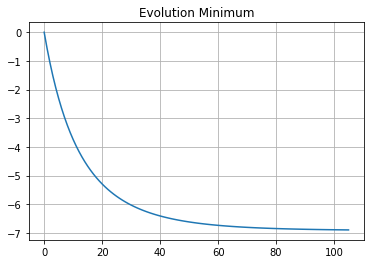

[[ 0.          0.        ]
 [ 1.         -4.38349824]
 [ 2.         -5.75937754]
 [ 3.         -6.32923246]
 [ 4.         -6.59920625]
 [ 5.         -6.73772514]
 [ 6.         -6.81259422]
 [ 7.         -6.85454135]
 [ 8.         -6.87865559]
 [ 9.         -6.89278239]
 [10.         -6.90117579]
 [11.         -6.90621621]
 [12.         -6.90926787]
 [13.         -6.9111271 ]
 [14.         -6.91226536]
 [15.         -6.91296485]
 [16.         -6.91339599]
 [17.         -6.91366233]
 [18.         -6.91382716]
 [19.         -6.91392932]]


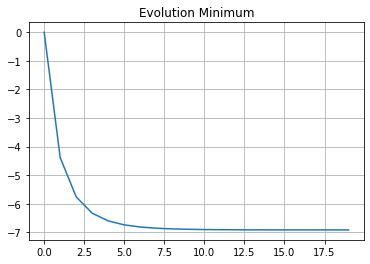

In [307]:
#----------------------------------------------------------------------------------------------#
## 5. Visualisez l’évolution des minimums de la fonction E(x) trouvés au cours des itérations ##
#----------------------------------------------------------------------------------------------#

def afficherDG(res):
    plt.plot(res[:,0],res[:,1])
    plt.title("Evolution Minimum")
    plt.grid()
    plt.show()

print(a)
afficherDG(a)

print(b)
afficherDG(b)

Max_iteration = 386
Min =  -6.913865530471172


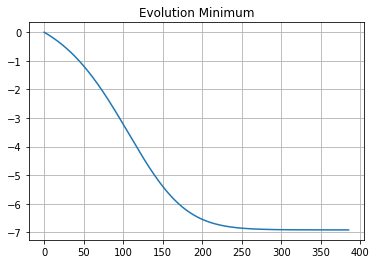

In [308]:
#----------------------------------------------------------------------#
## 6. Testez votre algorithme avec d’autres valeurs de e et nombremax ##
#----------------------------------------------------------------------#
g = DG(3,0.001,0.0001,500)
afficherDG(g)

In [0]:
#---------------------------------------------------------------------------#
## 1. Calculez les dérivées partielles de la fonction E(a, b) selon a et b ##
#---------------------------------------------------------------------------#

def modele(X, O):
    return X.dot(O)

def cout(X, y, O):
    m = len(y)
    return 1/(2*m) * np.sum((modele(X, O) - y)**2)

def grad(X, y, O):
    m = len(y)
    return 1/m * X.T.dot(modele(X, O) - y)
    
#----------------------------------#
## 2. Implémentez l’algorithme DG ##
#----------------------------------#

def DG_R(X, y, n, it):
    c = np.zeros(it)
    np.random.seed(0)
    O = np.random.randn(2,1)
    for i in range(0, it):
        O = O - n * grad(X, y, O)
        c[i] = cout(X, y, O)
    p = modele(X, O)
    print("\tDescente pour n =",n,"et nombreMax=",it)
    plt.figure()
    plt.scatter(x, y)
    plt.plot(x, p, c='r')
    return O, c

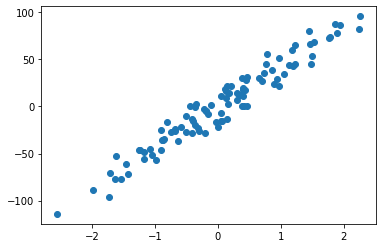

In [310]:
#----------------------------------------------------#
## 3. Importez la fonction datasets.make_regression ##
#----------------------------------------------------#
np.random.seed(0)
x, y = datasets.make_regression(n_samples=100, n_features=1, noise=10)
y = y.reshape(y.shape[0], 1)
X = np.hstack((x, np.ones(x.shape)))
plt.scatter(x,y)

	Descente pour n = 0.001 et nombreMax= 100


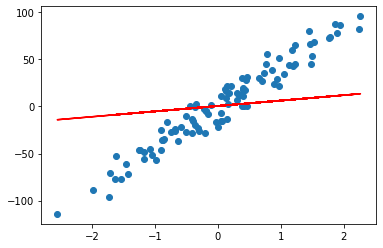

In [311]:
#----------------------------------------#
## 4. Affichez les coefficients trouvés ##
#----------------------------------------#
a,a1 = DG_R(X,y,0.001,100)

	Descente pour n = 0.001 et nombreMax= 500


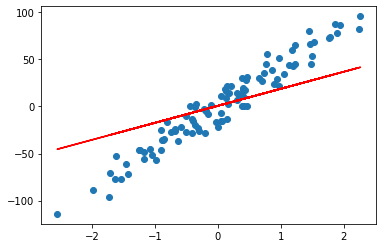

In [312]:
b = DG_R(X,y,0.001,500)

	Descente pour n = 0.001 et nombreMax= 1000


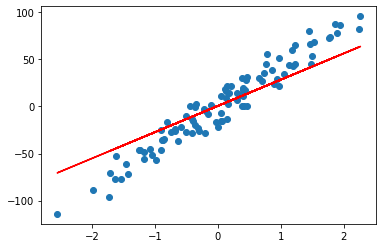

In [313]:
c = DG_R(X,y,0.001,1000)

	Descente pour n = 0.01 et nombreMax= 1000


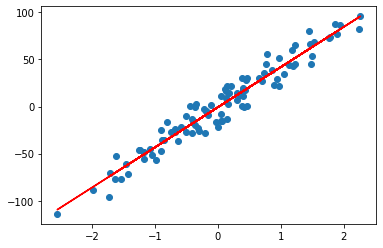

In [314]:
d = DG_R(X,y,0.01,1000)

	Descente pour n = 1.0 et nombreMax= 1000


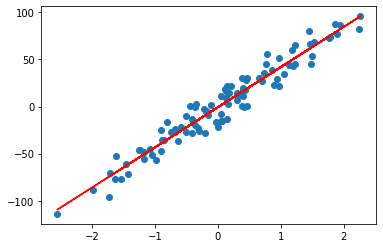

In [315]:
e,e1 =DG_R(X,y,1.0,1000)

In [0]:
#-----------------------------------------------------#
## 5. Importez la fonction stats.linregress de scipy ##
#-----------------------------------------------------#

#slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(e, e1)
